In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Getting Random Lats and Longs to Use

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(84.76021325979187, 130.61505232262306),
 (30.718159160692025, 101.60745753395804),
 (-84.25900191921139, 119.54832793720874),
 (53.01920723447725, 43.35141619859158),
 (-79.26606535073668, 48.10998872652672),
 (17.356535764701263, -5.951591239810057),
 (-77.34560320170219, 21.47635264702464),
 (-46.661177461689576, -59.75607802029988),
 (0.9064887266027455, 3.931685726359518),
 (-34.936790799026596, 144.41137442859753),
 (18.863950691472397, -123.74759989472656),
 (86.66426323347619, 83.85356020242659),
 (60.843930324143145, -112.50104754071121),
 (-7.8089683640515375, 52.76602304386196),
 (-37.703608020209835, -40.188446417214806),
 (81.59832952352875, -64.02925900347978),
 (7.35777617610384, 82.52121638380822),
 (1.3452249107763805, 53.42526292158797),
 (7.839387087636638, -138.95227345690031),
 (-52.790220372712994, 30.112536701998778),
 (12.310977720730946, 71.38048398941763),
 (-46.23784392674338, -109.44638957690027),
 (-23.074635116495358, -18.42665470844969),
 (-85.7268770358

# Getting the Closest City Using Lats and Longs

In [11]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

521

# Retrieving Weather Data using List of Cities using enumerate

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# find out what verion we are using to get requests
#requests.__version__

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [16]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
total_record_count = 0

# Loop through all the cities in the list.
for i, city in enumerate(cities):
   
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
    
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create URL for each each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record counts.
    record_count += 1
    total_record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Append data to city_data 
        city_data.append({"City": city.title(),
                          "Lat": city_weather["coord"]["lat"],
                          "Lng": city_weather["coord"]["lon"],
                          "Max Temp": city_weather["main"]["temp_max"],
                          "Humidity": city_weather["main"]["humidity"],
                          "Cloudiness": city_weather["clouds"]["all"], 
                          "Wind Speed": city_weather["wind"]["speed"],
                          "Country": city_weather["sys"]["country"], 
                          "Date": datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(f"Records found: {total_record_count}.")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | yaan
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | belinskiy
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | goundam
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | rawson
Processing Record 9 of Set 1 | yenagoa
Processing Record 10 of Set 1 | deniliquin
Processing Record 11 of Set 1 | guerrero negro
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | narsaq
Processing Record 17 of Set 1 | kalmunai
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | kavaratti
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | hobart
Pro

Processing Record 39 of Set 4 | sanming
Processing Record 40 of Set 4 | bintulu
Processing Record 41 of Set 4 | vao
Processing Record 42 of Set 4 | ocho rios
Processing Record 43 of Set 4 | klobuck
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | cartagena
Processing Record 46 of Set 4 | padang
Processing Record 47 of Set 4 | porto novo
Processing Record 48 of Set 4 | salisbury
Processing Record 49 of Set 4 | ulaanbaatar
Processing Record 50 of Set 4 | nagapattinam
Processing Record 1 of Set 5 | visnes
Processing Record 2 of Set 5 | igarka
Processing Record 3 of Set 5 | clyde river
Processing Record 4 of Set 5 | upata
Processing Record 5 of Set 5 | ryotsu
Processing Record 6 of Set 5 | zhanatas
City not found. Skipping...
Processing Record 7 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 5 | kapaa
Processing Record 9 of Set 5 | hamilton
Processing Record 10 of Set 5 | tahta
Processing Record 11 of Set 5 | hornepayne
Processing Recor

Processing Record 31 of Set 8 | sabang
Processing Record 32 of Set 8 | ahipara
Processing Record 33 of Set 8 | qaqortoq
Processing Record 34 of Set 8 | shubarkuduk
Processing Record 35 of Set 8 | atambua
Processing Record 36 of Set 8 | asyut
Processing Record 37 of Set 8 | denpasar
Processing Record 38 of Set 8 | plouzane
Processing Record 39 of Set 8 | katobu
Processing Record 40 of Set 8 | krasnoyarka
Processing Record 41 of Set 8 | mayo
Processing Record 42 of Set 8 | sur
Processing Record 43 of Set 8 | samfya
Processing Record 44 of Set 8 | fukue
Processing Record 45 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 46 of Set 8 | itagi
Processing Record 47 of Set 8 | olafsvik
Processing Record 48 of Set 8 | sitka
Processing Record 49 of Set 8 | mergui
City not found. Skipping...
Processing Record 50 of Set 8 | ternate
Processing Record 1 of Set 9 | ostrovnoy
Processing Record 2 of Set 9 | biak
Processing Record 3 of Set 9 | neiafu
Processing Record 4 of Set 9 | v

# City Data List to DataFrame

In [51]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,-22.16,97,56,8.10,RU,2021-11-23 00:38:27
1,Yaan,7.3833,8.5667,78.08,77,100,6.15,NG,2021-11-23 00:38:27
2,Albany,42.6001,-73.9662,34.38,67,13,9.15,US,2021-11-23 00:38:21
3,Belinskiy,52.9647,43.4165,13.46,99,100,4.56,RU,2021-11-23 00:38:28
4,Port Alfred,-33.5906,26.8910,65.71,85,99,20.29,ZA,2021-11-23 00:38:28
5,Goundam,16.4145,-3.6708,78.28,27,8,9.64,ML,2021-11-23 00:38:29
6,Bredasdorp,-34.5322,20.0403,55.27,76,50,6.02,ZA,2021-11-23 00:38:29
7,Rawson,-43.3002,-65.1023,51.48,53,100,13.15,AR,2021-11-23 00:38:29
8,Yenagoa,4.9247,6.2642,75.87,93,60,3.74,NG,2021-11-23 00:38:29
9,Deniliquin,-35.5333,144.9667,76.26,44,100,13.60,AU,2021-11-23 00:38:30


In [52]:
# Reorder Columns: City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#Assign a new or the same DataFrame with new column order:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2021-11-23 00:38:27,71.6872,128.8694,-22.16,97,56,8.10
1,Yaan,NG,2021-11-23 00:38:27,7.3833,8.5667,78.08,77,100,6.15
2,Albany,US,2021-11-23 00:38:21,42.6001,-73.9662,34.38,67,13,9.15
3,Belinskiy,RU,2021-11-23 00:38:28,52.9647,43.4165,13.46,99,100,4.56
4,Port Alfred,ZA,2021-11-23 00:38:28,-33.5906,26.8910,65.71,85,99,20.29
...,...,...,...,...,...,...,...,...,...
474,Marsh Harbour,BS,2021-11-23 00:49:55,26.5412,-77.0636,76.71,77,0,16.49
475,Goderich,CA,2021-11-23 00:46:39,43.7501,-81.7165,36.91,60,100,18.41
476,Sokoni,TZ,2021-11-23 00:51:08,-6.4333,39.5500,79.65,74,99,8.66
477,Saquarema,BR,2021-11-23 00:50:59,-22.9200,-42.5103,69.82,82,2,10.74


In [53]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Start of Plotting

In [54]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

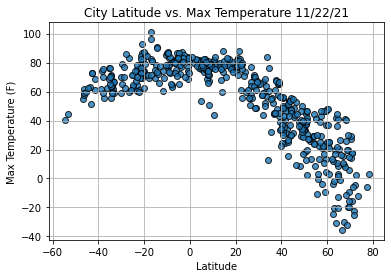

In [55]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")
# Show plot.
plt.show()

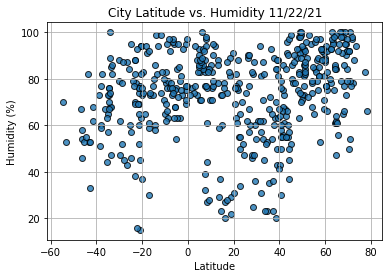

In [56]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

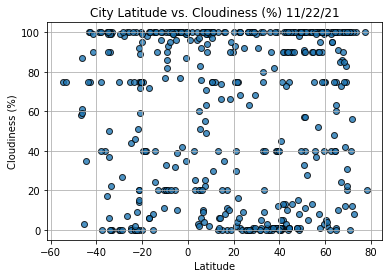

In [57]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

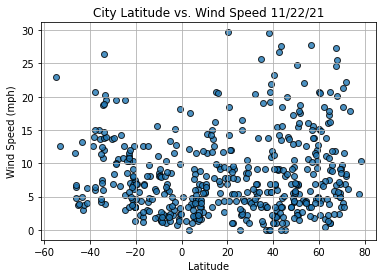

In [58]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Linear Regression on Weather Data

In [59]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [60]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    correlation_coefficient = r_value
    print (f"Correlation coefficient is: {r_value:.3f}")
    print (f"Probability value is: {p_value:.3f}")
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()


# Creating DataFrames for Northern and Southern Hemispheres (using equator's Latitude)

In [61]:
index13 = city_data_df.loc[13]
index13

City                     Victoria
Country                        HK
Date          2021-11-23 00:34:00
Lat                       22.2855
Lng                      114.1577
Max Temp                    61.25
Humidity                       78
Cloudiness                    100
Wind Speed                   1.01
Name: 13, dtype: object

In [62]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
474     True
475     True
476    False
477    False
478    False
Name: Lat, Length: 479, dtype: bool

In [63]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2021-11-23 00:38:27,71.6872,128.8694,-22.16,97,56,8.10
1,Yaan,NG,2021-11-23 00:38:27,7.3833,8.5667,78.08,77,100,6.15
2,Albany,US,2021-11-23 00:38:21,42.6001,-73.9662,34.38,67,13,9.15
3,Belinskiy,RU,2021-11-23 00:38:28,52.9647,43.4165,13.46,99,100,4.56
5,Goundam,ML,2021-11-23 00:38:29,16.4145,-3.6708,78.28,27,8,9.64


In [64]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

Correlation coefficient is: -0.869
Probability value is: 0.000


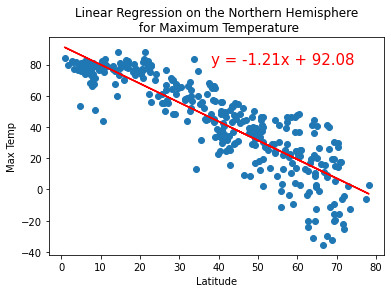

In [65]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere\n for Maximum Temperature''', 'Max Temp',(38,80))

Correlation coefficient is: 0.612
Probability value is: 0.000


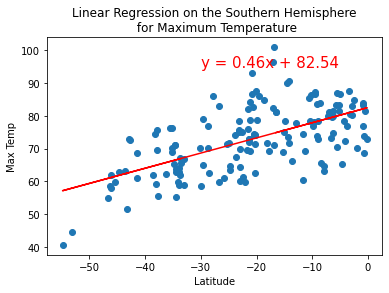

In [66]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere\n for Maximum Temperature''', 'Max Temp',(-30,95))

Correlation coefficient is: 0.249
Probability value is: 0.000


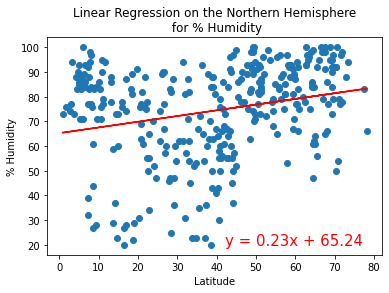

In [67]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere\n for % Humidity''','% Humidity',(42,20))


Correlation coefficient is: 0.333
Probability value is: 0.000


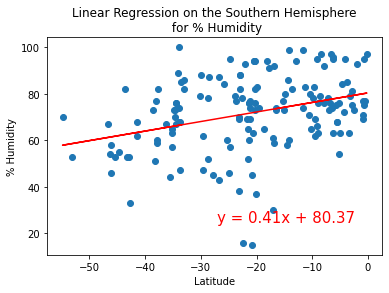

In [68]:
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere\n for % Humidity''', '% Humidity',(-27,25))


Correlation coefficient is: 0.128
Probability value is: 0.021


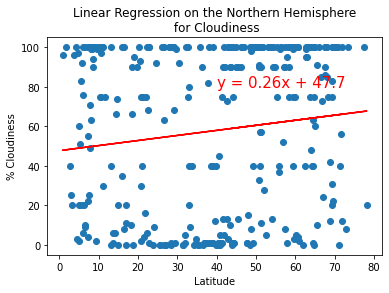

In [69]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere\n for Cloudiness''', '% Cloudiness',(40,80))

Correlation coefficient is: 0.132
Probability value is: 0.102


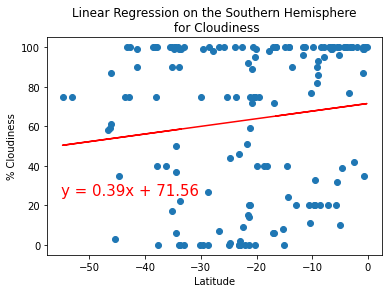

In [70]:
# Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere\n for Cloudiness''', '% Cloudiness',(-55,25))

Correlation coefficient is: 0.188
Probability value is: 0.001


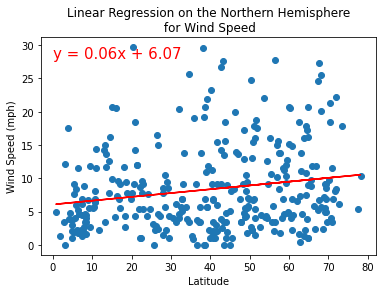

In [71]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere\n for Wind Speed''', 'Wind Speed (mph)',(0,28))

Correlation coefficient is: -0.379
Probability value is: 0.000


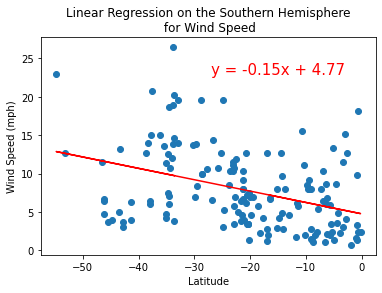

In [72]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere\n for Wind Speed''', 'Wind Speed (mph)',(-27,23))